# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rachmat Risky Saputra
- **Email:** rachmatrisky5@gmail.com
- **ID Dicoding:** rahmtris

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan penyewaan sepeda pada hari libur dibandingkan dengan hari biasa?
- Apakah terdapat tren peningkatan atau penurunan penyewaan sepeda dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [67]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

mount google drive pada google colab untuk mengakses dataset.

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
days_df = pd.read_csv("drive/MyDrive/colab-notebooks/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dari output di atas, bisa dipahami dataset ini berisi data peminjaman sepeda secara harian.

In [70]:
hours_df = pd.read_csv("drive/MyDrive/colab-notebooks/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Berikutnya pada dataset hour.csv, memiliki kolom-kolom yang sama dengan day.csv. hanya saja, dataset ini memiliki kolom hr (hours) dan bedasarkan peminjaman yang dilakukan per jamnnya bukan harian.

**Insight:**
- dari hasil output di atas, bisa diketahui kedua dataset ini berisi data tentang rental sepeda, days_df berisi data harian dan hours_df berisi data perjamnya. Kedua dataset memeliki jumlah kolom yang sama yaitu sebanyak 16 kolom. Namun terdapat perbedaan, yaitu pada hours_df memiliki 1 tambahan kolom yaitu hr.

### Assessing Data

Melihat informasi pada dataset days_df, seperti jumlah kolom, tipe data kolom, jumlah data dan penggunaan memori.

In [71]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada output di atas, terlihat terdapat kesalahan tipe data pada kolom dteday, kolom ini bertipe data object, yang seharusnya bertipe data datetime.

Mengecek apakah terdapat missing value pada days_df.

In [72]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mengecek apakah terdapat data yang terduplikasi pada hours_df.

In [73]:
days_df.duplicated().sum()

0

Melihat paramater statistik dari kolom-kolom yang bertipe numerik pada days_df.

In [74]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melihat informasi pada dataset hours_df, seperti jumlah kolom, tipe data kolom, jumlah data dan penggunaan memori.

In [75]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


hal yang sama juga terjadi pada dataset hour. Yaitu terdapat kesalahan tipe data pada kolom dteday, yang seharusnya bertipe data datetime.

Mengecek apakah terdapat missing value pada days_df.

In [76]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Mengecek apakah terdapat data yang terduplikasi pada hours_df.

In [77]:
hours_df.duplicated().sum()

0

Melihat paramater statistik dari kolom-kolom yang bertipe numerik pada hours_df.

In [78]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- dari beberapa output di atas, bisa diketahui dataset day.csv memiliki 731 data, dan untuk dataset hour memiliki 17379 data.
- Kedua dataset sudah cukup bersih, tidak ditemukan baik itu missing values dan data duplikat.
- Terdapat kesalahan tipe data pada kolom dteday pada kedua dataset. Kolom ini bertipe data object, seharusnya kolom ini bertipe data datetime.

### Cleaning Data

pada tahap cleaning data ini, saya mengubah kolom dteday pada kedua dataset menjadi bertipe data datetime.

In [79]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

In [80]:
days_df.info()
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

terlihat pada output di atas, kolom dteday sudah berhasil diubah menjadi bertipe datetime.

In [81]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    days_df[column] =  days_df[column].astype("category")
    hours_df[column] =  hours_df[column].astype("category")

Mengganti beberapa nama kolom pada days_df dan hours_df agar lebih mudah dipahami.

In [82]:
days_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [83]:
hours_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

Mengganti nama kolom season menjadi sebuah kata, yaitu nama dari musim-musim yang ada di dataset dalam bahasa inggris (Sprint, Summer, Fall, Winter).

In [84]:
days_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hours_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

<ipython-input-84-7d118cefb726>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-84-7d118cefb726>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'),

Mengganti nilai kolom one_of_week dari yang berupa angka menjadi nama hari dalam bahasa inggris.

In [85]:
days_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hours_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

<ipython-input-85-fac98705e87b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
<ipython-input-85-fac98705e87b>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_df.one_of_week.re

mengganti nilai kolom month dari yang berupa angka menjadi nama bulan dalam bahasa inggris.

In [86]:
days_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hours_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

<ipython-input-86-44c278fd83e8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
<ipython-input-86-44c278fd83e8>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_df.month.r

Mengganti nilai kolom year dari yang berupa angka 0 dan 1 menjadi angka tahun 2011 dan 2012.

In [87]:
days_df.year.replace({0: 2011, 1: 2012}, inplace=True)
hours_df.year.replace({0: 2011, 1: 2012}, inplace=True)

<ipython-input-87-4ab542925b66>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days_df.year.replace({0: 2011, 1: 2012}, inplace=True)
<ipython-input-87-4ab542925b66>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Mengecek kembali pada days_df dan hours_df bahwa nama kolom sudah diganti dengan benar.

In [88]:
days_df.head()

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
hours_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Berdasarkan output di atas, sudah bisa dipastikan proses cleaning yang dilakukan berjalan dengan baik dan benar.

**Insight:**
- Kedua dataset sudah dibersihkan. terdapat beberapa modifikasi juga yang saya lakukan, seperti mengganti beberapa nama kolom-kolom pada kedua dataset. Hal ini saya lakukan untuk memudahkan dalam membaca dan memahami maksud dari kolom-kolom tersebut.

## Exploratory Data Analysis (EDA)

### Melakukan Eksplorasi pada days_df

In [90]:
days_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731,731.000000,731,731.0,731,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2.0,7,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jan,0.0,Sunday,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710.0,105,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [91]:
days_df.groupby(by="workingday").agg({
    "count_cr": ["sum", "min", "max", "mean"]
})

count_cr                        
                sum  min   max         mean
workingday                                 
0           1000269  605  8714  4330.168831
1           2292410   22  8362  4584.820000

In [92]:
days_df.groupby(by=["year", "month"]).agg({
    "count_cr": "sum"
})

<ipython-input-92-f8b5537d0a5f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by=["year", "month"]).agg({


count_cr
year month          
2011 Jan       38189
     Feb       48215
     Mar       64045
     Apr       94870
     May      135821
     Jun      143512
     Jul      141341
     Aug      136691
     Sep      127418
     Oct      123511
     Nov      102167
     Dec       87323
2012 Jan       96744
     Feb      103137
     Mar      164875
     Apr      174224
     May      195865
     Jun      202830
     Jul      203607
     Aug      214503
     Sep      218573
     Oct      198841
     Nov      152664
     Dec      123713

### Melakukan explorasi pada hours_df

In [93]:
hours_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,0.0,Saturday,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [94]:
hours_df.groupby(by="hours").agg({
    "count_cr": ["sum", "min", "max", "mean"]
})

count_cr                     
           sum min  max        mean
hours                              
0        39130   2  283   53.898072
1        24164   1  168   33.375691
2        16352   1  132   22.869930
3         8174   1   79   11.727403
4         4428   1   28    6.352941
5        14261   1   66   19.889819
6        55132   1  213   76.044138
7       154171   1  596  212.064649
8       261001   5  839  359.011004
9       159438  14  426  219.309491
10      126257   8  539  173.668501
11      151320  10  663  208.143054
12      184414   3  776  253.315934
13      184919  11  760  253.661180
14      175652  12  750  240.949246
15      183149   7  750  251.233196
16      227748  11  783  311.983562
17      336860  15  976  461.452055
18      309772  23  977  425.510989
19      226789  11  743  311.523352
20      164550  11  567  226.030220
21      125445   6  584  172.314560
22       95612   9  502  131.335165
23       63941   2  256   87.831044

**Insight:**
- Berdasarkan output yang dihasilkan dari days_df, jumlah peminjaman sepeda baik yang pengguna yang kasual atau terdaftar berkisar dari angka 22 hingga 8714 di setiap harinya. dengan rata-rata 4504.348837.
- Berdasarkan output dari fungi agregasi pada kolom workingday di atas bisa diketahui bahwa jumlah peminjaman pada working day lebih banyak dibandingkan pada non working day. Yaitu sebesar 2292410 dibandingkan dengan 10000269.
- Berdasarkan output dari fungsi agregasi pada kolom tahun dan bulan di atas, dapat diketahui bahwa terjadi peningkatan penyewaan sepeda pada tahun 2012 dibandingkan tahun 2011.
- Berdasarkan output dari hasil explorasi hours_df di atas, diketahui bahwa jumlah peminjaman sepeda baik yang pengguna yang kasual atau terdaftar berkisar dari angka 1 hingga 997 pada tiap jam. dengan rata-rata 189.463088.
- Berdasarkan output dari fungsi agregasi pada kolom jam di atas, terlihat bahwa pada jam 5 sore terdapat jumlah peminjaman terbanyak yaitu sebesar 336860. Untuk jumlah peminjaman terkecil terdapat pada jam 4 pagi, yaitu 4428.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan penyewaan sepeda pada hari libur dibandingkan dengan hari biasa?

In [95]:
sum_count_cr = days_df.groupby("one_of_week").count_cr.sum().sort_values(ascending=False).reset_index()

<ipython-input-95-4c2cad1d9601>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_count_cr = days_df.groupby("one_of_week").count_cr.sum().sort_values(ascending=False).reset_index()


<ipython-input-96-7a242b9e06bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


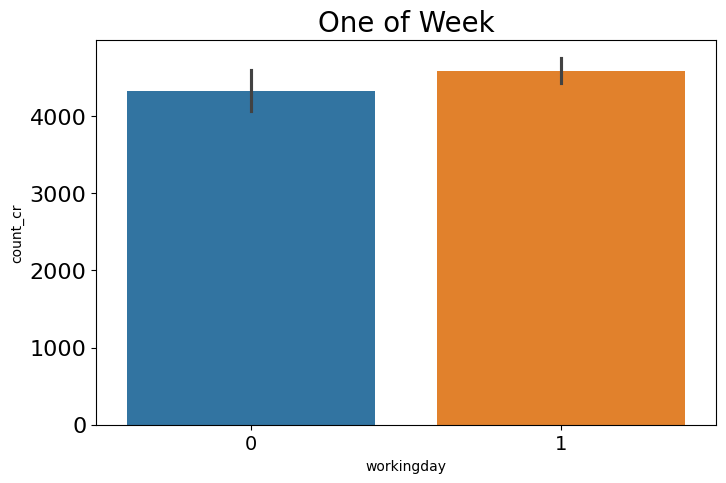

In [96]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(
        y="count_cr",
        x="workingday",
        data=days_df.sort_values(by="workingday"),
        palette="tab10",
        ax=ax,
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebu
ax.set_title("One of Week", loc="center", fontsize=20)
ax.set_ylabel("count_cr")
ax.set_xlabel("workingday")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=16)

# menampilkan plot
plt.show()

### Pertanyaan 2: Apakah terdapat tren peningkatan atau penurunan penyewaan sepeda dari tahun ke tahun?

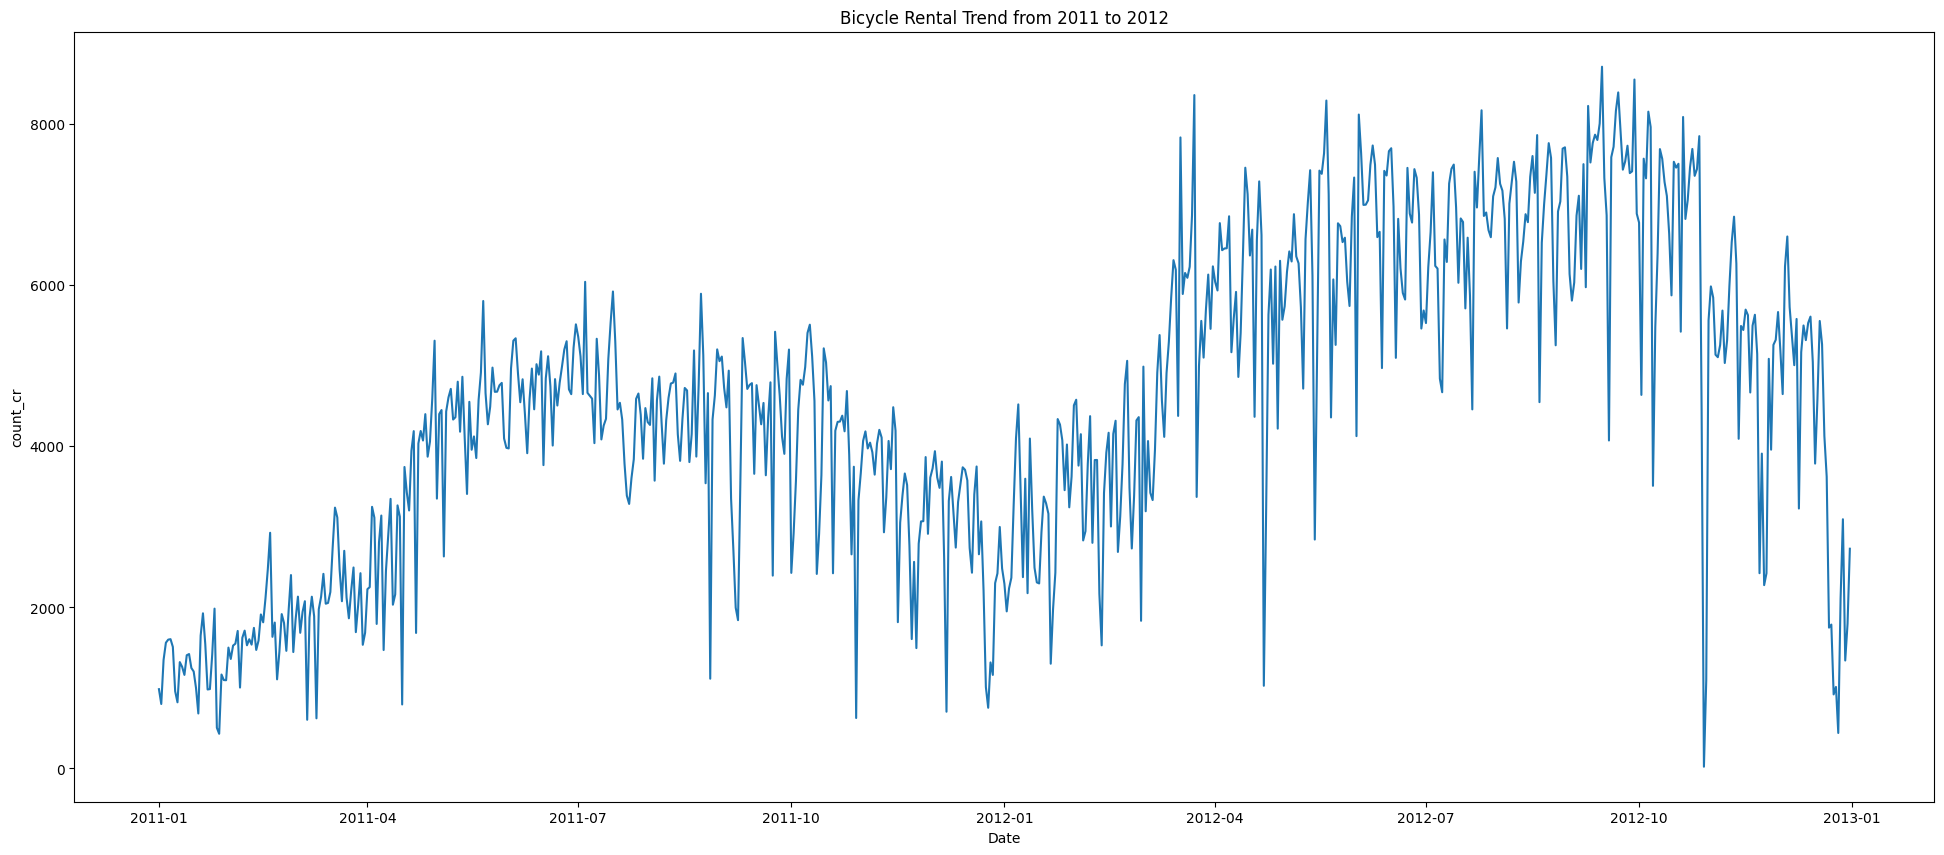

In [97]:
plt.figure(figsize=(24, 10))

monthly_count = days_df["count_cr"].groupby(days_df["dteday"]).max()

plt.plot(monthly_count.index, monthly_count.values)
plt.xlabel("Date")
plt.ylabel("count_cr")
plt.title("Bicycle Rental Trend from 2011 to 2012")
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi yang dilakukan pada kolom workingday di atas, didapatkan informasi bahwa terdapat lebih banyak penyewaan sepeda pada working day, dibanding non working day. Namun perbedaan jumlah tersebut tidak terlalu signifikan. Yaitu pada workingday terdapat total penyewaan sebanyak 2292410, dan untuk non working day sebanyak 1000269.
- Berdasarkan output dari hasil visualisasi pada kolom dteday di atas, dapat dilihat bahwa tren penyewaan sepeda dari tahun ke tahun naik turun. Selain itu, dapat diketahui juga penyewaan terbanyak di bulan desember oktober 2012.

## Analisis Lanjutan (Opsional)

### Melakukan RFM Analysis pada dataset hours_df.

In [98]:
current_date = max(hours_df['dteday'])
RFM_df = hours_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,
    'instant': 'count',
    'count_cr': 'sum'
}).reset_index()

RFM_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

RFM_df.head()

,registered,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602


Analisis RFM di atas bertujuan untuk memahami perilaku dari berbagai pengguna rental sepeda, khususnya jika mereka adalah pengguna "registered" atau tidak.

- Recency: Nilai ini secara rata-rata mencari tahu berapa lama waktu terakhir kali semua jenis pengguna menggunakan layanan sepeda.
- Frequency: Nilai ini berhubungan dengan seberapa banyak aktivitas (contohnya dalam hal ini penyewaan) yang telah dilakukan oleh semua jenis pengguna secara total
- Monetary: Nilai ini adalah hasil dari dijumlahkannya total nilai "count_cr" untuk seluruh pengguna.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan hasil visualisasi yang telah didapatkan sebelumnya, didapatkan kesimpulan bahwa total jumlah penyewaan sepeda pada working day lebih banyak daripada non working day, yaitu sebanyak 2292410 penyewaan sepeda terjadi pada working day, dan pada non working day terjadi penyewaan yang lebih sedikit yaitu 1000269 penyewaan.

- Conclution pertanyaan 2: Berdasarkan hasil visualisasi yang telah didapatkan sebelumnnya, bisa dikatakan bahwa tren penyewaan sepeda mengalami naik turun. pada bulan januari 2012 terdapat penurunan jumlah penyewaan sepeda dan kembali naik pada beberapa bulan berikutnya, hingga puncaknya pada bulan oktober 2012, yang memiliki jumlah penyewaan terbanyak. Lebih spesifik lagi, angka penyewaan terendah terjadi pada bulan Januari 2011 yaitu sebanyak 38189 penyewaan, dan untuk angka penyewaan tertinggi terjadi pada bulan September 2012, yaitu sebanyak 218573 penyewaan. dari hasil ini, bisa disimpulkan bahwa terjadi tren naik turun jumlah penyewaan sepeda, namun hampir selalu ada kenaikan jumlah penyewaan di setiap bulannya.

### Export dataset yang sudah dibersihkan

In [99]:
days_df.to_csv("cleaned_day.csv", index=False)
hours_df.to_csv("cleaned_hour.csv", index=False)